### Problem Statement
## To predict if the client will subscribe a term deposit (variable y).

-  The data is related with direct marketing campaigns of a Portuguese banking institution. 
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
- https://www.kaggle.com/code/ahmedmagdee/bank-marketing-with-ann

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import norm
from scipy import stats
from scipy.stats import zscore ,skew
from scipy.stats.mstats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv(r"D:\archive (17)\bank-additional-full.csv",sep=';')

In [12]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
df.duplicated().sum()

12

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
categorical_data = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['float64' , 'int64']).columns

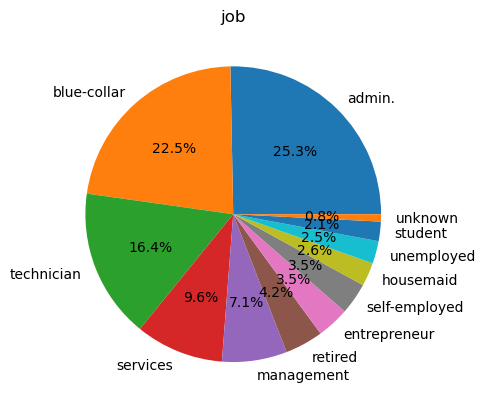

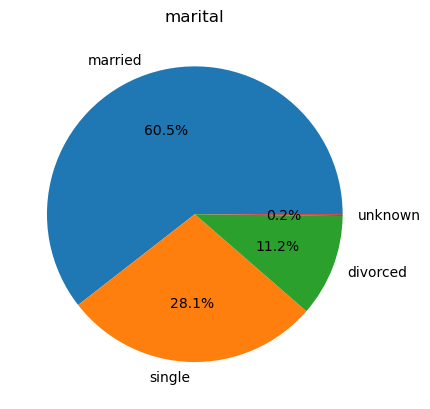

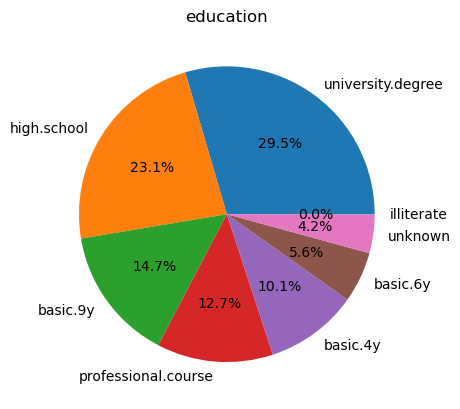

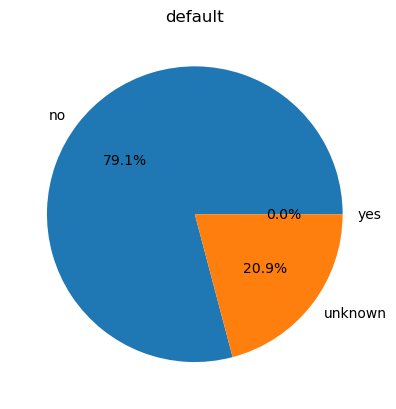

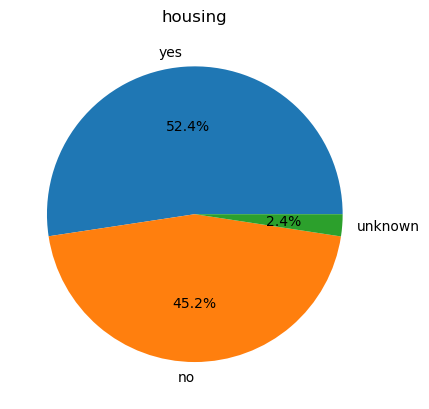

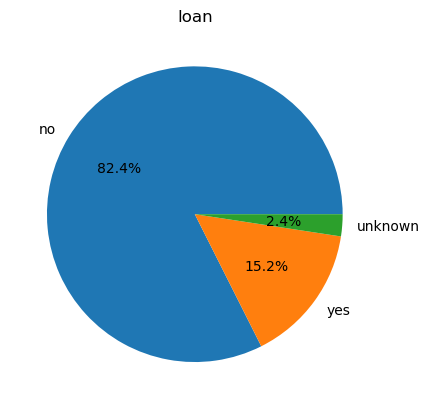

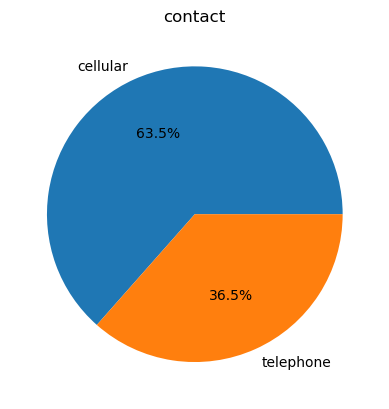

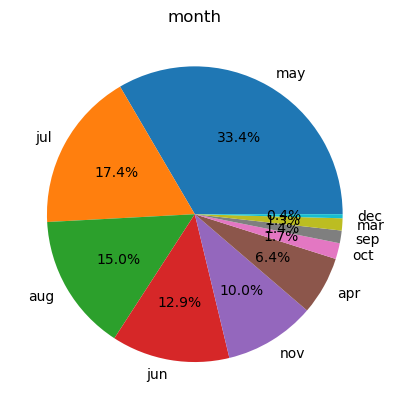

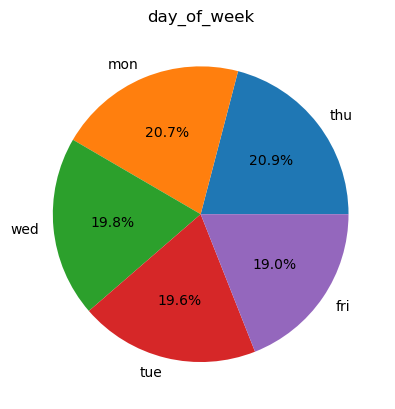

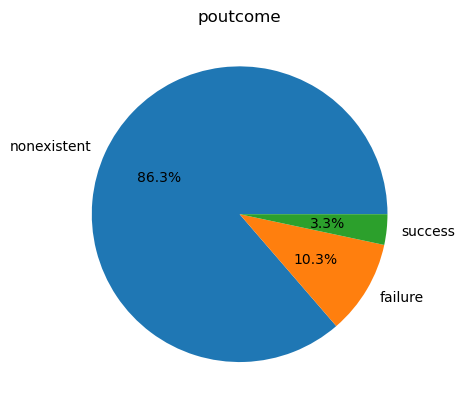

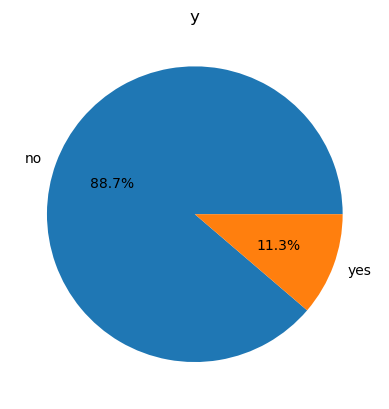

In [22]:
for column in categorical_data:
    perceage = (df[column].value_counts() * 100) / len(df)
    values = df[column].value_counts().values
    labels = df[column].value_counts().index
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(column)  
    plt.show()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 



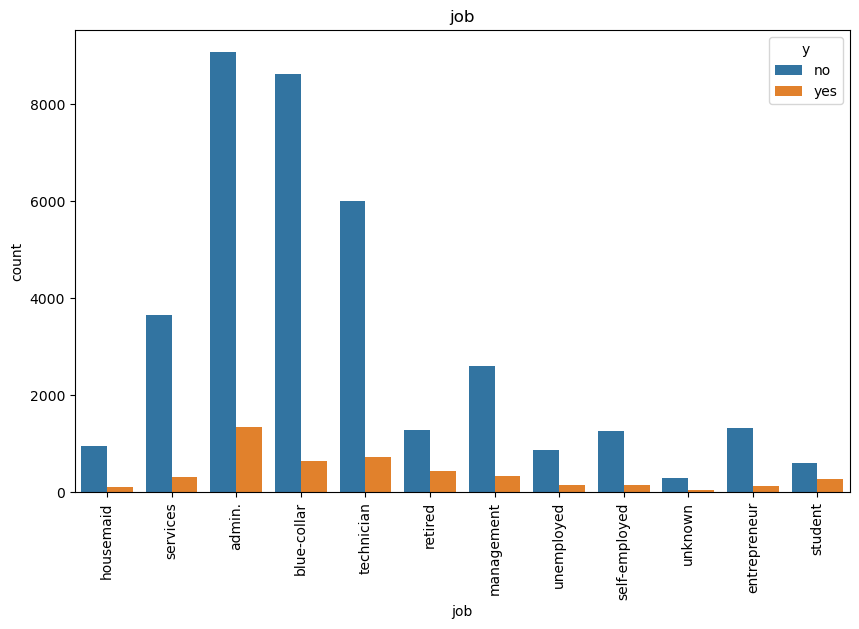

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64 



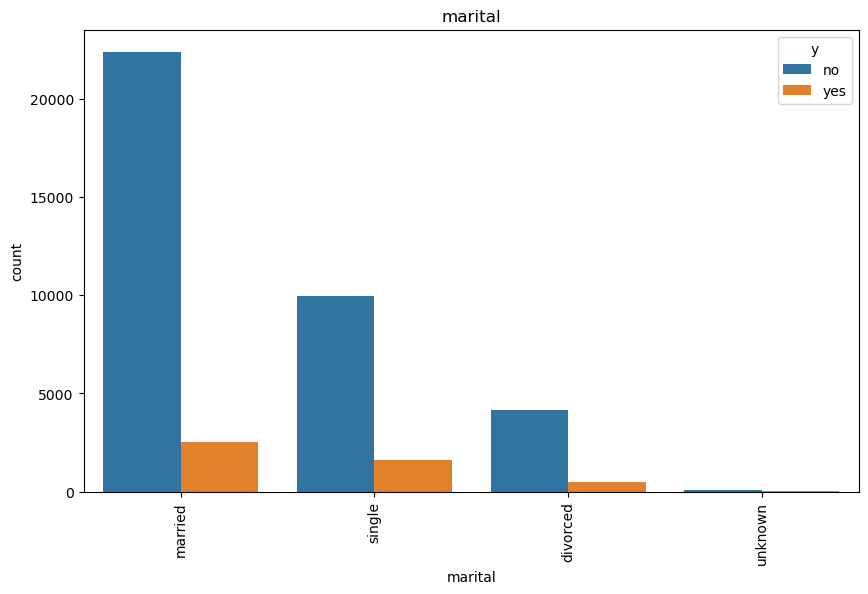

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64 



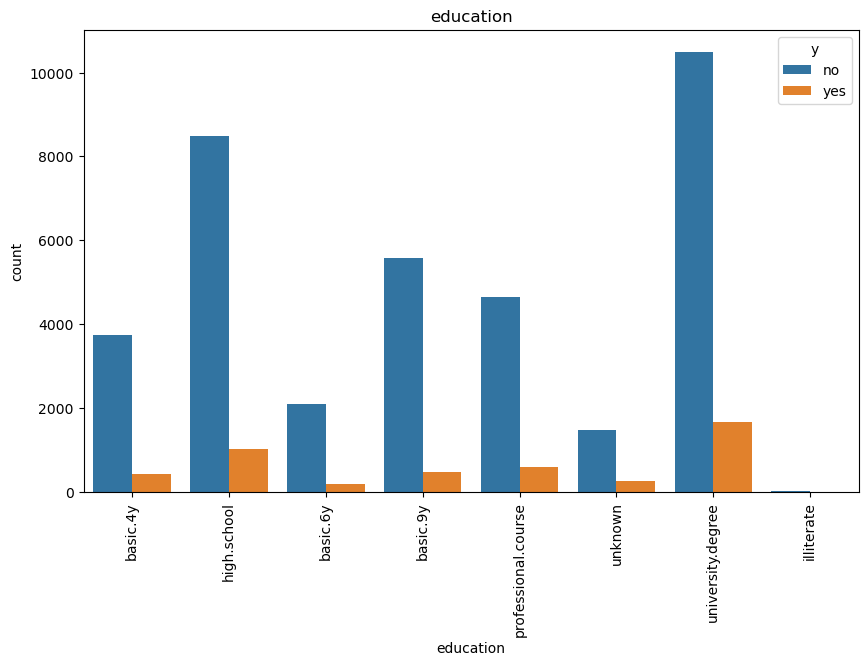

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64 



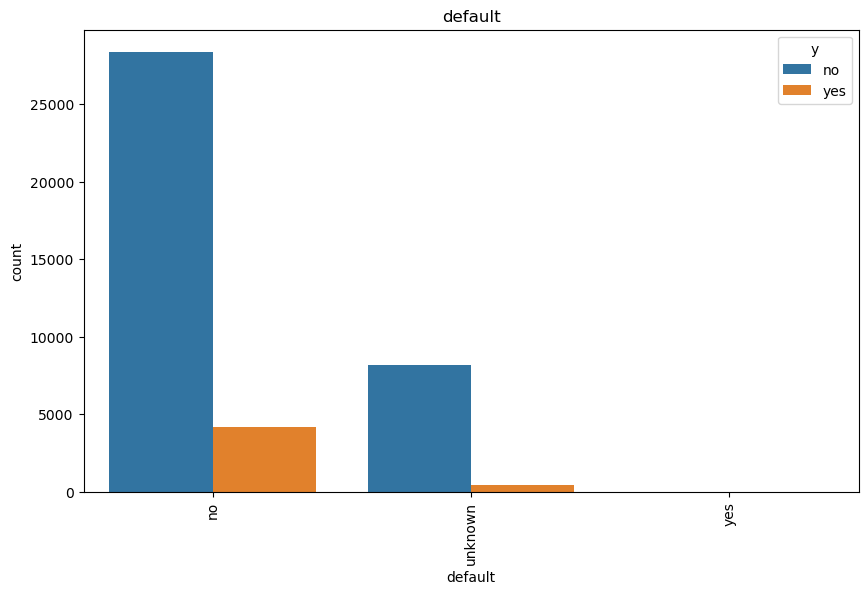

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64 



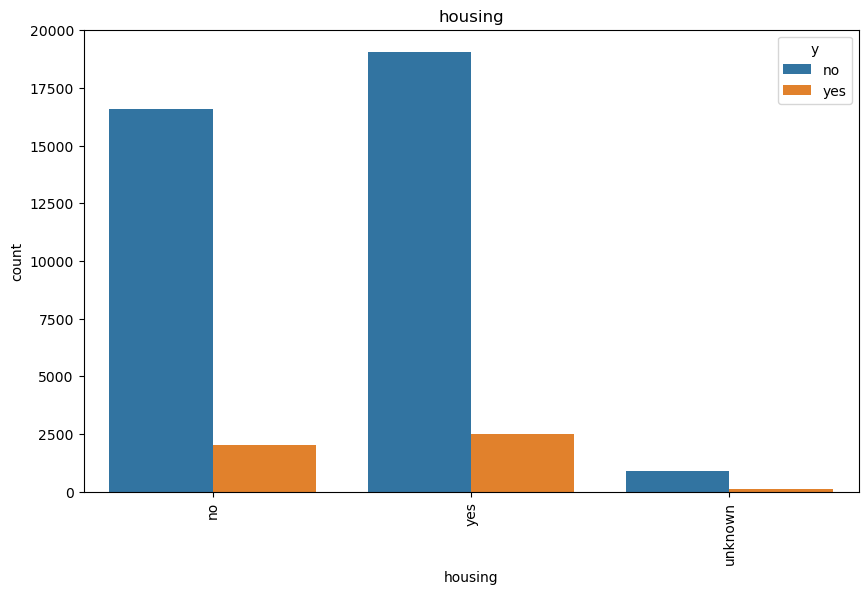

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64 



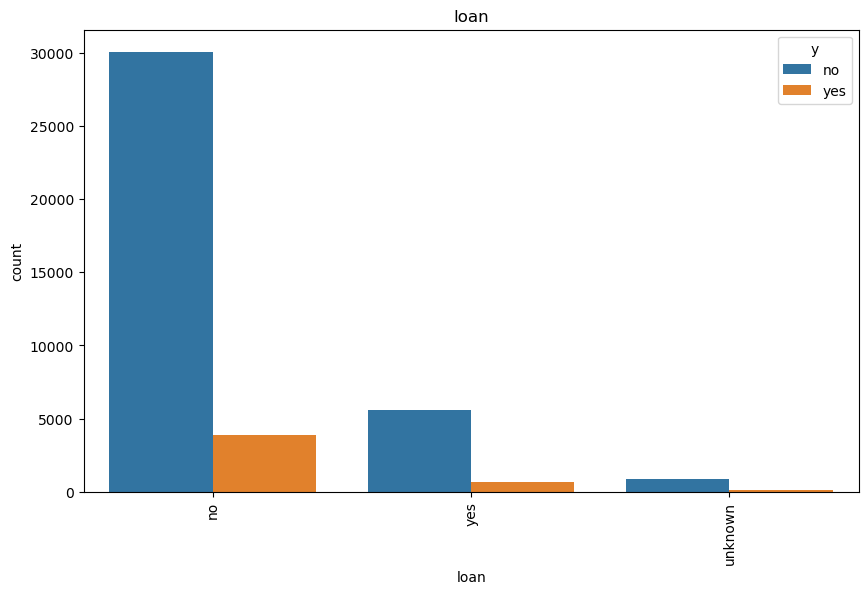

contact
cellular     26135
telephone    15041
Name: count, dtype: int64 



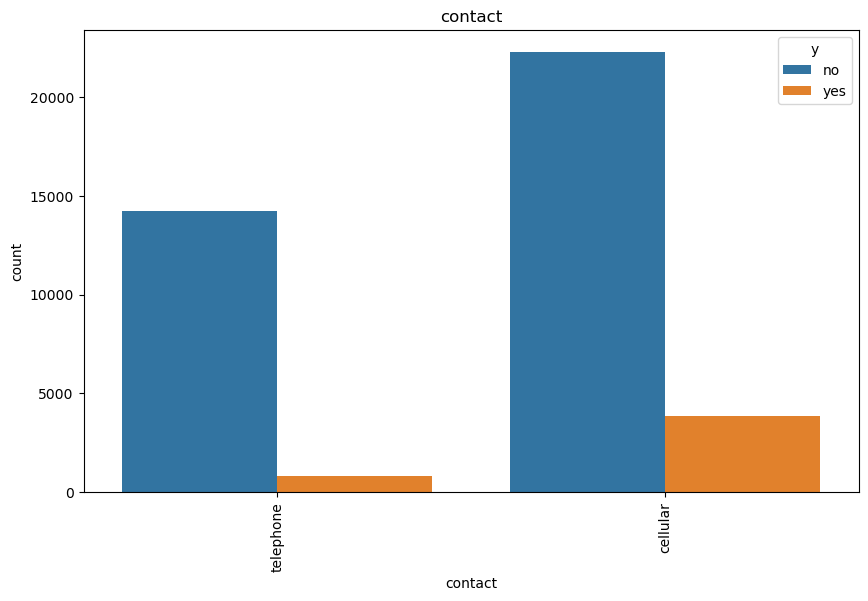

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64 



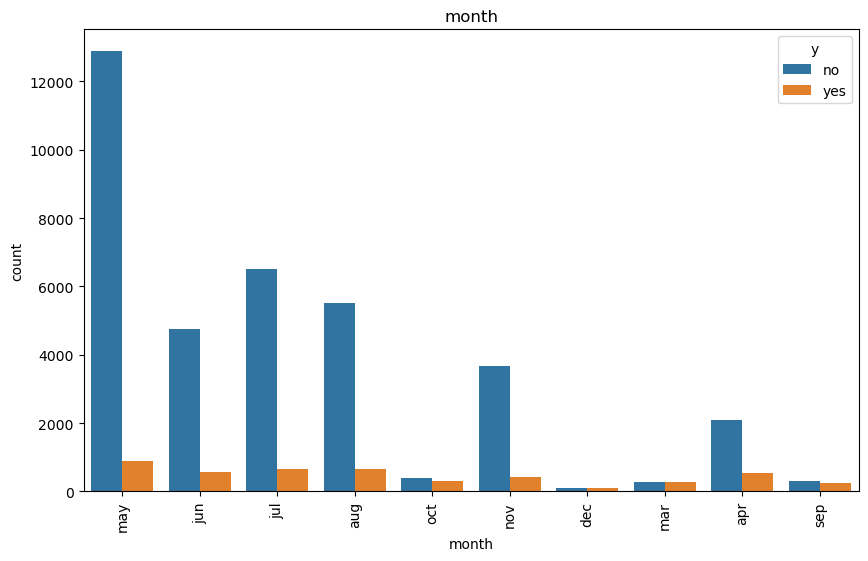

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64 



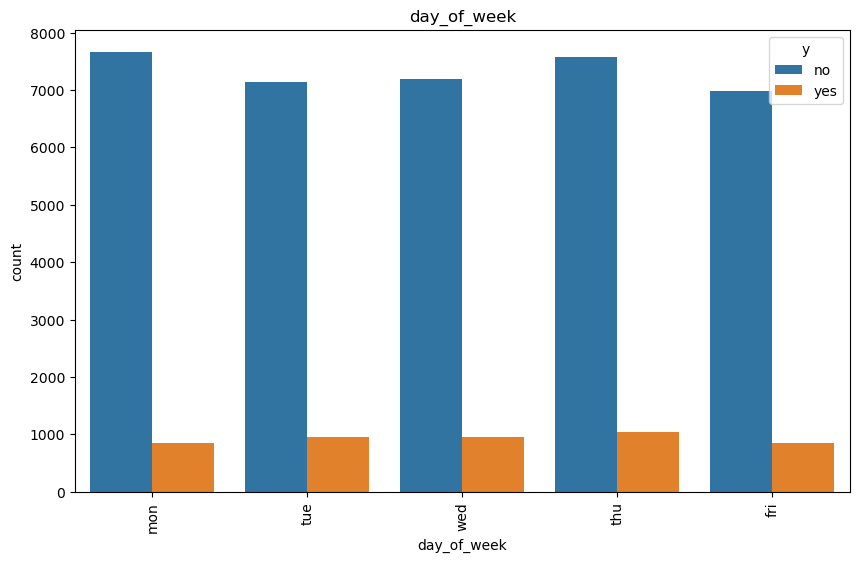

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64 



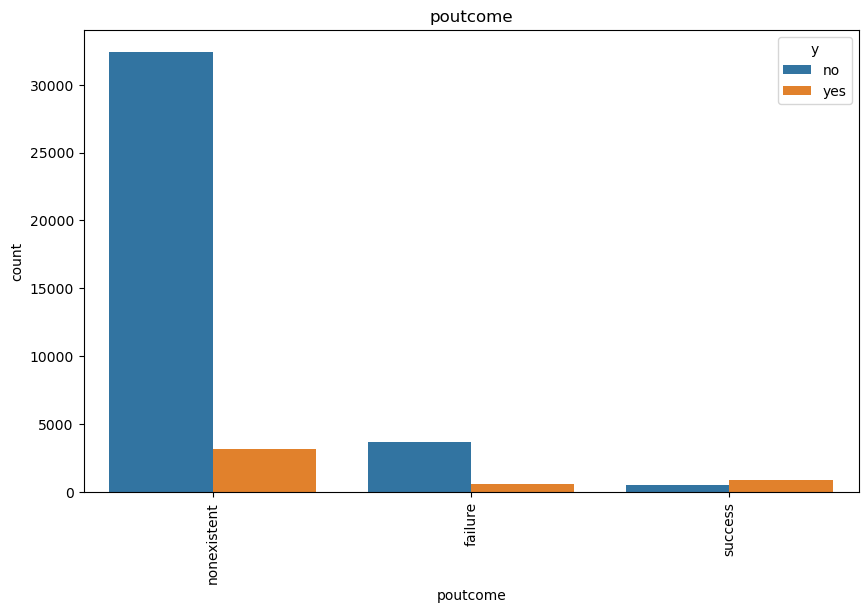

y
no     36537
yes     4639
Name: count, dtype: int64 



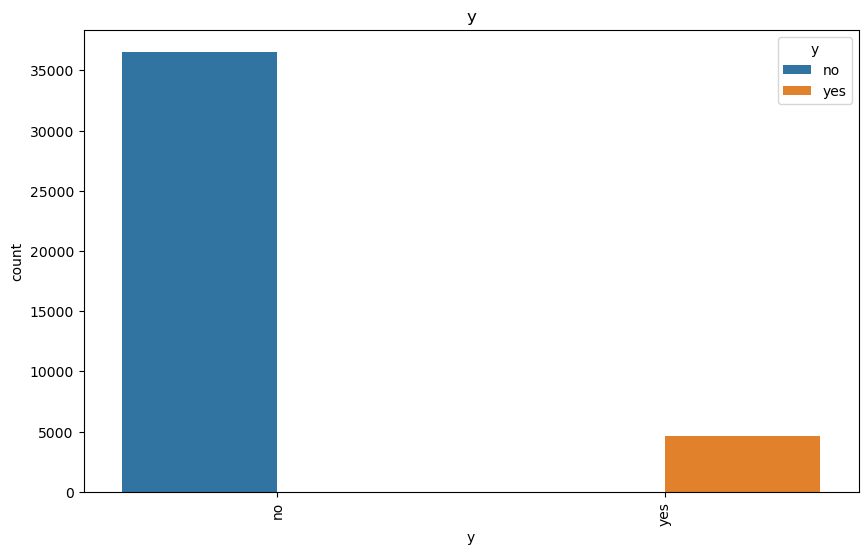

In [23]:
categorical_data = df.select_dtypes(include=['object'])
for column in categorical_data:
    print(df[column].value_counts() , '\n')
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=column, data=df , hue = 'y')
    plt.xticks(rotation=90)  
    plt.title(column)  
    plt.show()

## Categorical Encoding

In [24]:
le = LabelEncoder()
for i in categorical_data:
    df[i] = le.fit_transform(df[i])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [25]:
X = df.drop('y' ,axis = 1)
y = df['y']
key=X.keys()

## Numerical Feature Scaling

In [26]:
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X , columns=key)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533143,-0.201475,-0.283703,-1.753753,-0.513657,-1.087787,-0.45257,1.318174,0.762504,-0.718775,0.010352,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695
1,1.629107,0.911363,-0.283703,-0.349596,1.945111,-1.087787,-0.45257,1.318174,0.762504,-0.718775,-0.421577,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695
2,-0.290177,0.911363,-0.283703,-0.349596,-0.513657,0.942065,-0.45257,1.318174,0.762504,-0.718775,-0.124626,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695
3,-0.002284,-1.036103,-0.283703,-1.285700,-0.513657,-1.087787,-0.45257,1.318174,0.762504,-0.718775,-0.413864,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695
4,1.533143,0.911363,-0.283703,-0.349596,-0.513657,-1.087787,2.31104,1.318174,0.762504,-0.718775,0.187751,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,3.164534,0.354944,-0.283703,0.586509,-0.513657,0.942065,-0.45257,-0.758625,1.193549,-1.434249,0.291876,-0.565963,0.195443,-0.349551,0.192651,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41172,0.573501,-0.757894,-0.283703,0.586509,-0.513657,-1.087787,-0.45257,-0.758625,1.193549,-1.434249,0.480845,-0.565963,0.195443,-0.349551,0.192651,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41173,1.533143,0.354944,-0.283703,1.054561,-0.513657,0.942065,-0.45257,-0.758625,1.193549,-1.434249,-0.267317,-0.204990,0.195443,-0.349551,0.192651,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41174,0.381573,1.467781,-0.283703,0.586509,-0.513657,-1.087787,-0.45257,-0.758625,1.193549,-1.434249,0.708379,-0.565963,0.195443,-0.349551,0.192651,-0.752402,2.058076,-2.225059,-1.495197,-2.815689


<Axes: >

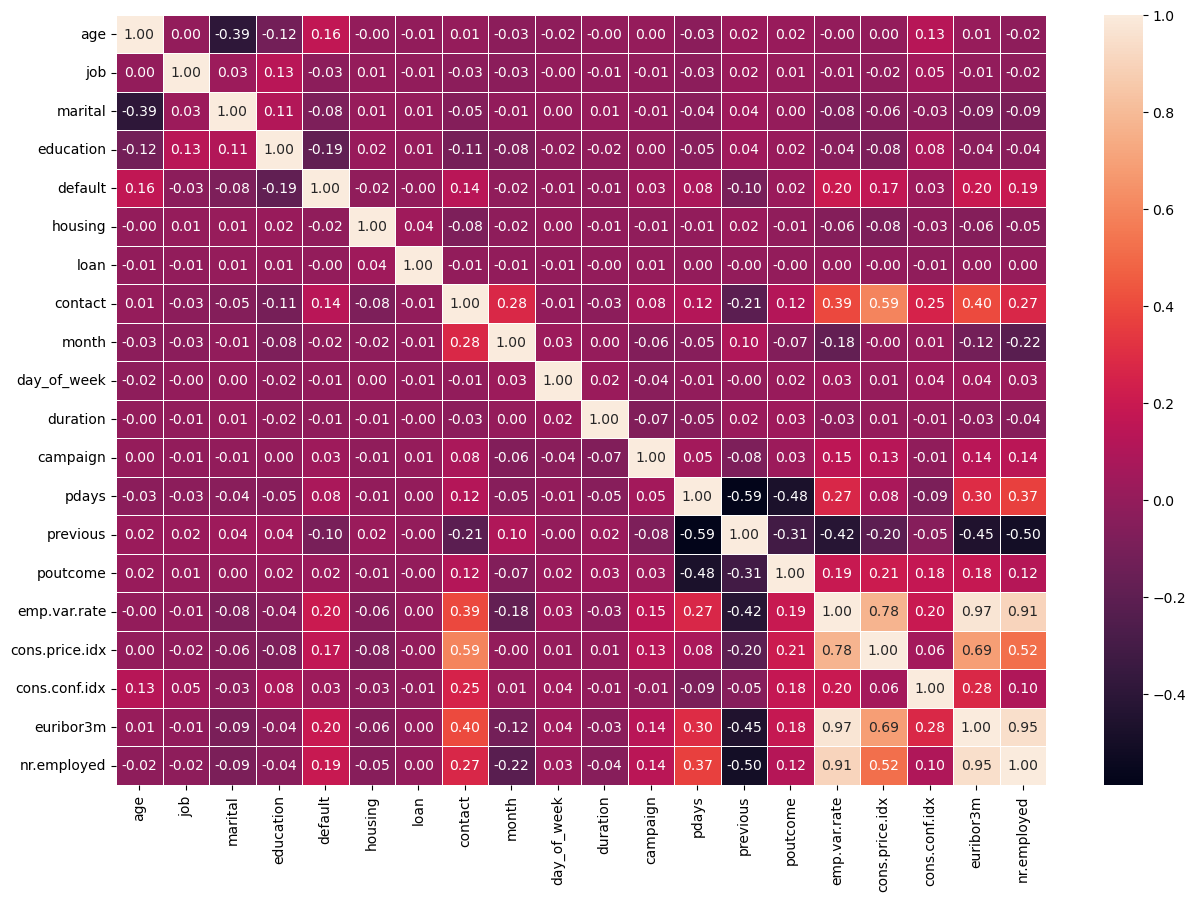

In [28]:
corr = X.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr , annot=True, linewidths=0.5, fmt='.2f')

## ANN

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=33)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (32940, 20)
X_test shape (8236, 20)
y_train shape (32940,)
y_test shape (8236,)


In [30]:
model = Sequential()
model.add(Dense(128 , activation='relu' , input_dim = X.shape[1]))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(1 , activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss = 'binary_crossentropy' ,  optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train , y_train , epochs=20 , batch_size=64 , validation_data=(X_test, y_test))

Epoch 1/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9020 - loss: 0.2451 - val_accuracy: 0.9117 - val_loss: 0.1955
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9122 - loss: 0.1924 - val_accuracy: 0.9121 - val_loss: 0.1917
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.1830 - val_accuracy: 0.9119 - val_loss: 0.1902
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9172 - loss: 0.1798 - val_accuracy: 0.9059 - val_loss: 0.1963
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9178 - loss: 0.1815 - val_accuracy: 0.9103 - val_loss: 0.1901
Epoch 6/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9180 - loss: 0.1749 - val_accuracy: 0.9106 - val_loss: 0.1875
Epoch 7/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9185 - loss: 0.1731 - val_accuracy: 0.9088 - val_loss: 0.1932
Epoch 8/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9196 - loss: 0.1721 - val_accuracy: 0.

In [33]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9130 - loss: 0.1913
Test Loss : 0.19155041873455048
Test accuracy : 0.9093006253242493


In [34]:
history = pd.DataFrame(history.history)
history

,accuracy,loss,val_accuracy,val_loss
0,0.908865,0.210563,0.911729,0.195483
1,0.913145,0.190895,0.912093,0.191660
2,0.915361,0.185343,0.911850,0.190226
3,0.915665,0.182274,0.905901,0.196265
4,0.917092,0.179189,0.910272,0.190100
5,0.916697,0.176573,0.910636,0.187514
6,0.918579,0.173231,0.908815,0.193223
7,0.919642,0.170656,0.913550,0.185771
8,0.921129,0.169457,0.909422,0.186466
9,0.921494,0.167467,0.910515,0.186617
